## Support Vector Machine
A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### Linear

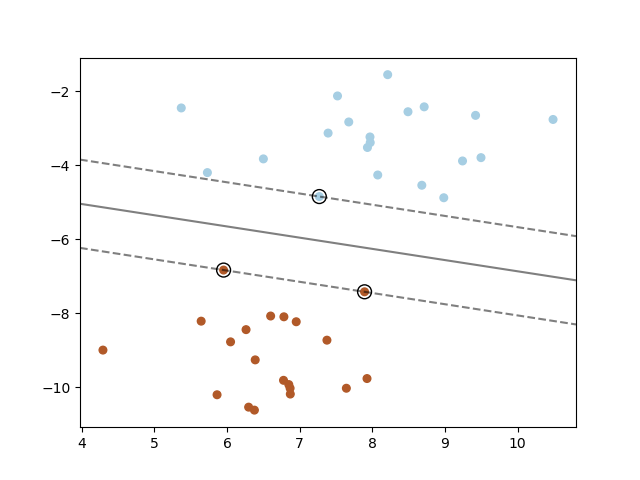

In [1]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
iris = load_iris()

In [2]:
iris['target'].astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
iris = load_iris()
data=pd.DataFrame(data= np.c_[iris['data'], iris['target'].astype(int)],columns= iris['feature_names'] + ['target'])
data['target'] = data['target'].apply(pd.to_numeric)
data.sample(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
97,6.2,2.9,4.3,1.3,1.0
86,6.7,3.1,4.7,1.5,1.0
74,6.4,2.9,4.3,1.3,1.0
43,5.0,3.5,1.6,0.6,0.0


In [4]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [5]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='|S10')

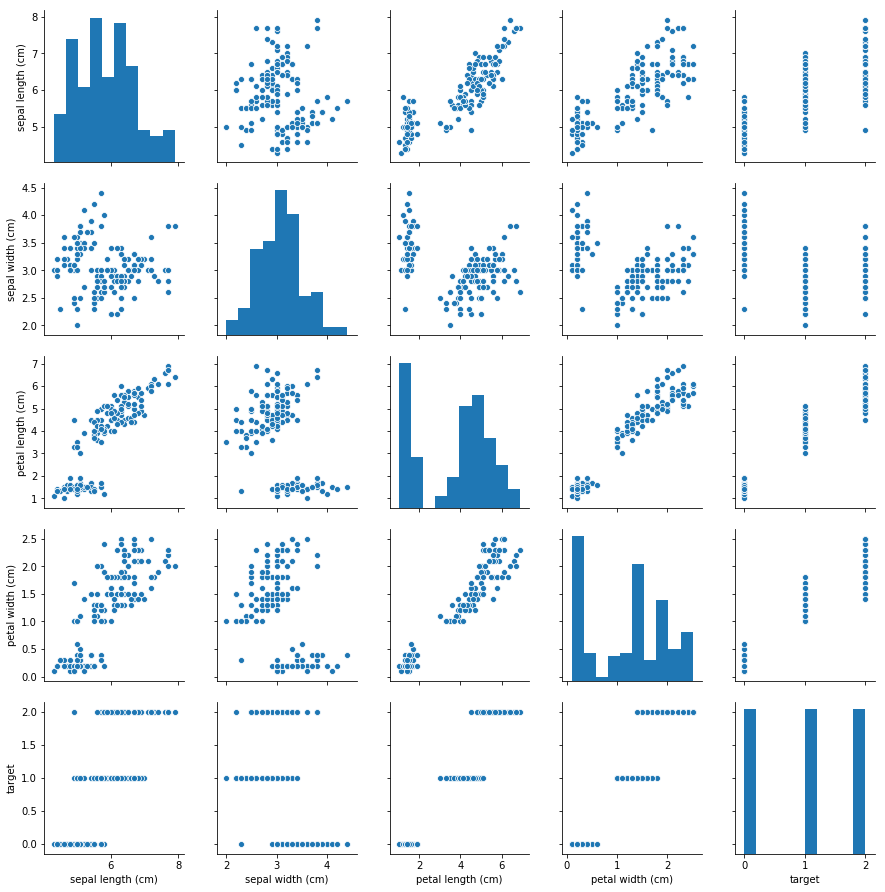

In [6]:
# sns.pairplot(data, hue="target",vars=['setosa', 'versicolor', 'virginica'])
sns.pairplot(data)

In [7]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
X_train, X_test, y_train, y_test = train_test_split (iris.data, iris.target, test_size = .20) 
clf= SVC()
clf = clf.fit(X_train, y_train)

/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [9]:
y_pred = clf.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

1.0


### Radial Basis Function
* for non-linear problems

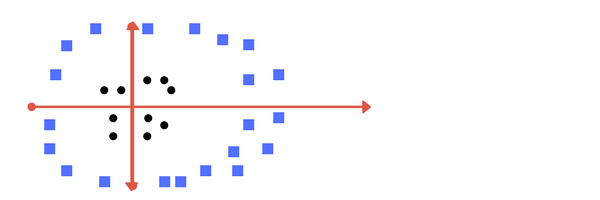
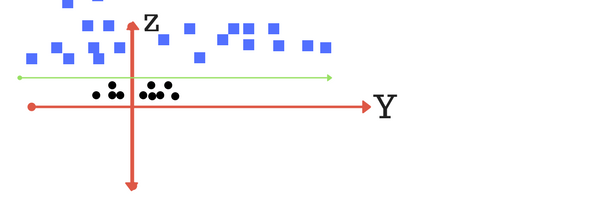
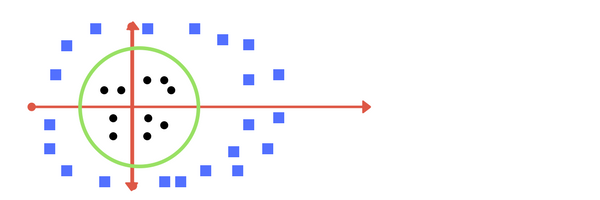

https://www.youtube.com/watch?v=3liCbRZPrZA

In [10]:
data=pd.read_csv('../datasets/radial.csv')

In [11]:
data.sample(10)

,V1,V2,target
1,-0.020962,-0.477874,1.0
11,0.156239,-0.867809,0.0
97,-0.647365,-0.363424,1.0
37,-0.058379,0.284870,1.0
67,0.339732,0.106100,1.0
55,0.951420,-0.040900,0.0
47,0.065798,-0.504584,1.0
63,0.739602,-0.842703,0.0
16,-1.074786,-0.733362,0.0
7,-0.455620,-0.134060,1.0


In [12]:
X = data.iloc [:,:-1].values
y = data.iloc [:,-1].values

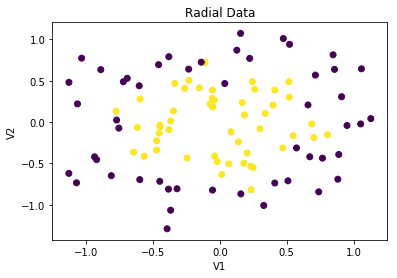

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c = y)
plt.title ('Radial Data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = .20) 
clf= SVC(kernel='linear')
clf = clf.fit(X_train, y_train)

In [15]:
from sklearn import metrics

print('Training Accuracy')
print(metrics.accuracy_score(y_train,clf.predict(X_train)))

print('Test Accuracy')
print(metrics.accuracy_score(y_test,clf.predict(X_test)))

Training Accuracy
0.5125
Test Accuracy
0.45


### Phoneme Dataset

In [16]:
data=pd.read_csv('../datasets/phoneme.csv')

In [17]:
data.head()

,V1,V2,V3,V4,V5,Class
0,0.489927,-0.451528,-1.047990,-0.598693,-0.020418,1
1,-0.641265,0.109245,0.292130,-0.916804,0.240223,1
2,0.870593,-0.459862,0.578159,0.806634,0.835248,1
3,-0.628439,-0.316284,1.934295,-1.427099,-0.136583,1
4,-0.596399,0.015938,2.043206,-1.688448,-0.948127,1


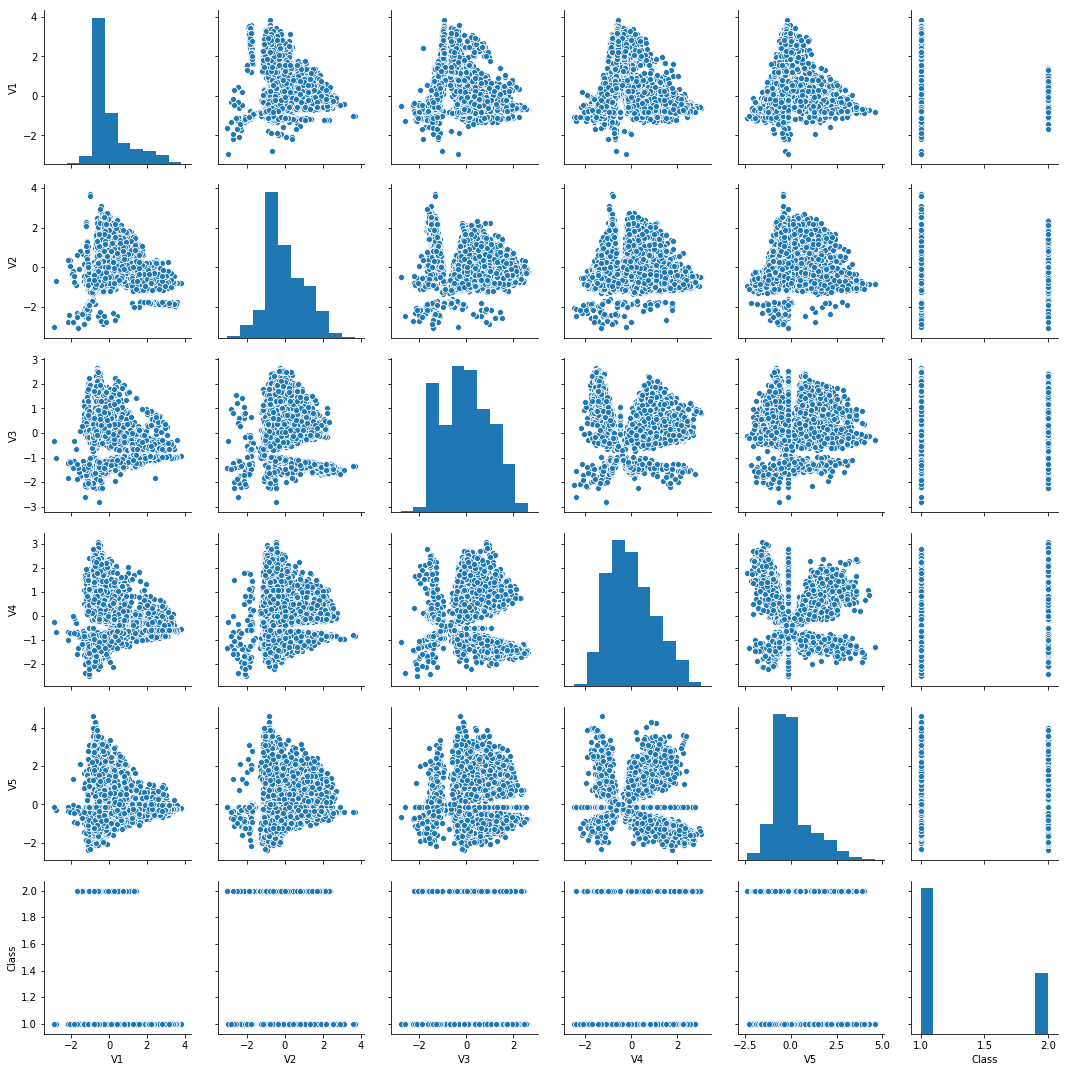

In [18]:
sns.pairplot(data)

In [19]:
X=data.iloc [:,:5].values
y=data.iloc [:,-1].values

In [20]:
y

array([1, 1, 1, ..., 2, 1, 2])

In [21]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = .20)
clf= SVC(kernel='rbf')
clf = clf.fit(X_train, y_train)

In [22]:
y_pred = clf.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.8547641073080481
